In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pandas_datareader it helps us to read the data fast
from pandas_datareader import data as pdr
# yfinance it will help to get stcok market data from yahoo site
import yfinance as yf
yf.pdr_override()

In [15]:
# Creating the df for each stock and period  
TM = pdr.get_data_yahoo("TATAMOTORS.NS",start ="2014-04-01", end = "2023-03-31")

[*********************100%***********************]  1 of 1 completed


In [16]:
MM = pdr.get_data_yahoo("M&M.NS",start ="2014-04-01", end = "2023-03-31")

[*********************100%***********************]  1 of 1 completed


In [17]:
AL = pdr.get_data_yahoo("ASHOKLEY.NS",start ="2014-04-01", end = "2023-03-31")

[*********************100%***********************]  1 of 1 completed


In [18]:
MA = pdr.get_data_yahoo("MARUTI.NS",start ="2014-04-01", end = "2023-03-31")

[*********************100%***********************]  1 of 1 completed


In [96]:
TM.tail()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns
Date,,,,,,,,,,
2023-03-23,416.000000,422.500000,416.000000,419.149994,417.847687,9817460,4.084063e+09,428.921001,427.48700,0.007330
2023-03-24,419.000000,420.549988,414.799988,416.500000,415.205933,6877960,2.881865e+09,428.986001,427.41950,-0.006322
2023-03-27,416.000000,418.500000,410.250000,412.049988,410.769745,7433933,3.092516e+09,428.900001,427.30600,-0.010684
2023-03-28,414.149994,414.500000,400.450012,401.600006,400.352234,9553659,3.956648e+09,428.923001,427.21725,-0.025361
2023-03-29,401.600006,410.600006,401.600006,409.200012,407.928619,10478506,4.208168e+09,428.685001,427.11025,0.018924


In [19]:
# Make sure to download if you want use the in offline
TM.to_csv('TM_Stock2023.csv')
MM.to_csv('MM_Stock2023.csv')
AL.to_csv('AL_Stock2023.csv')
MA.to_csv('MA_Stock2023.csv')

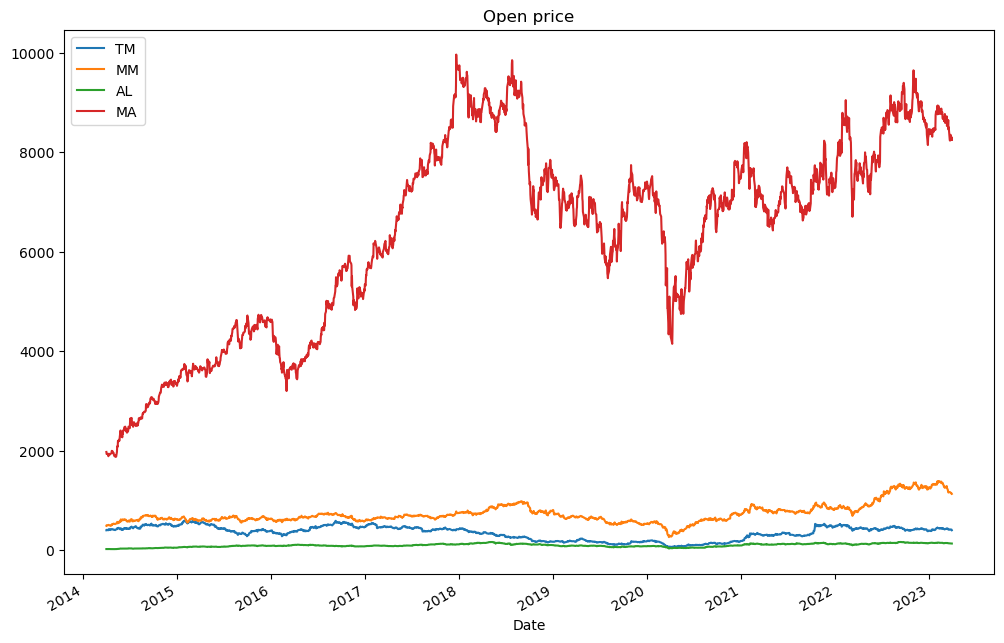

In [38]:
# PLOTING the Open price of all stocks
TM['Open'].plot(label='TM' ,title="Open price",figsize=(12,8))
MM['Open'].plot(label='MM')
AL['Open'].plot(label='AL')
MA['Open'].plot(label='MA')
plt.legend()

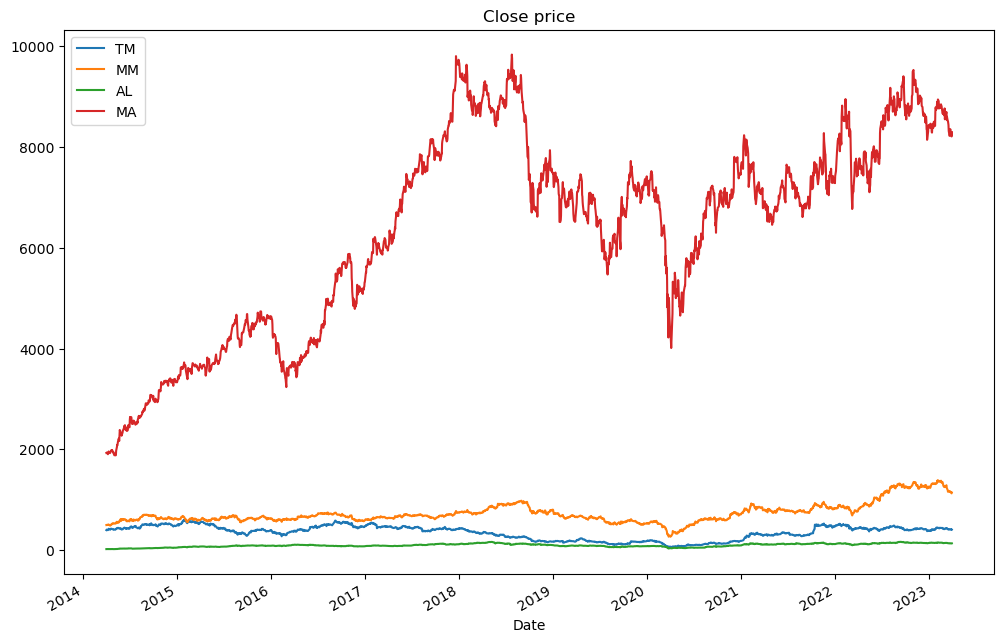

In [35]:
# PLOTING the Close price of all stocks
TM['Close'].plot(label='TM' ,title="Close price",figsize=(12,8))
MM['Close'].plot(label='MM')
AL['Close'].plot(label='AL')
MA['Close'].plot(label='MA')
plt.legend()

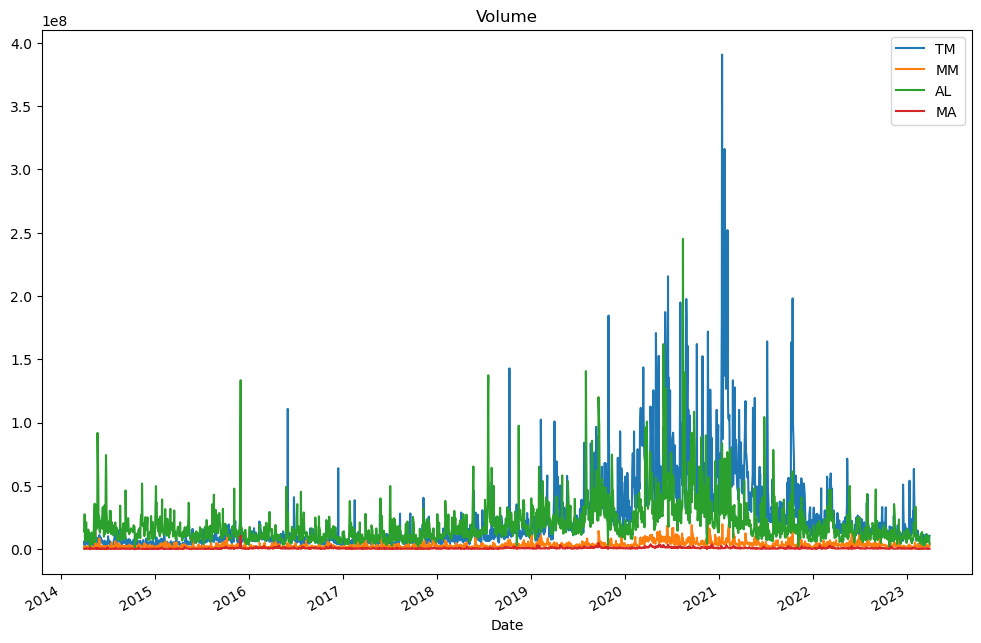

In [37]:
# PLOTING the Volume of all stocks
TM['Volume'].plot(label='TM' ,title="Volume",figsize=(12,8))
MM['Volume'].plot(label='MM')
AL['Volume'].plot(label='AL')
MA['Volume'].plot(label='MA')
plt.legend()

In [41]:
# Total_Traded = Open_Price*Volume
TM['Total_Traded'] = TM['Open']*TM['Volume']
MM['Total_Traded'] = MM['Open']*MM['Volume']
AL['Total_Traded'] = AL['Open']*AL['Volume']
MA['Total_Traded'] = MA['Open']*MA['Volume']

<AxesSubplot:xlabel='Date'>

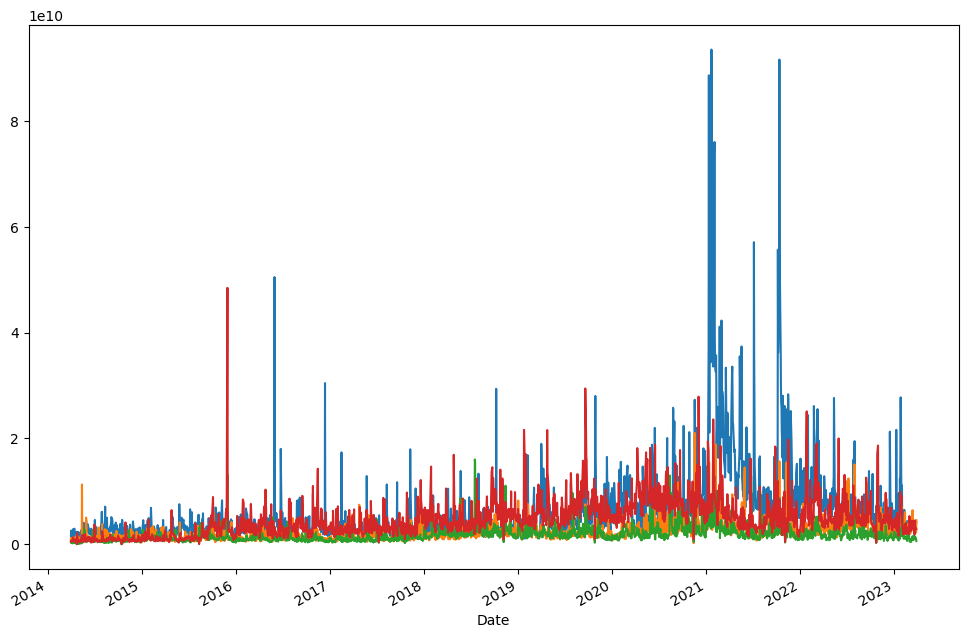

In [43]:
# Polt the Total_Traded
TM['Total_Traded'].plot(label ="TM",figsize=(12,8))
MM['Total_Traded'].plot(label ="MM")
AL['Total_Traded'].plot(label ="AL")
MA['Total_Traded'].plot(label ="MA")

In [44]:
# To know highest peak of the stcok
TM['Total_Traded'].argmax()

1677

In [45]:
# To know the time of the peak
TM['Total_Traded'].index[1677]

Timestamp('2021-01-22 00:00:00')

<AxesSubplot:xlabel='Date'>

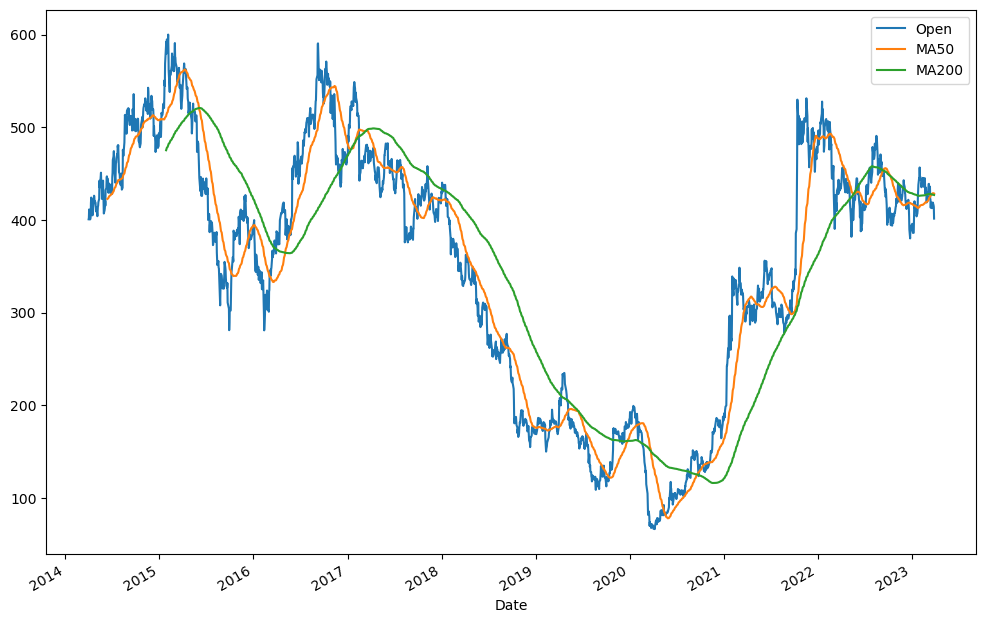

In [46]:
# Now we will plot the MA(Moving Average) of the stock. MA50, MA200 and OPenPrice
TM["MA50"] =TM['Open'].rolling(50).mean()
TM["MA200"] =TM['Open'].rolling(200).mean()
TM[['Open','MA50','MA200']].plot(label='gm' ,figsize=(12,8))

<AxesSubplot:xlabel='Date'>

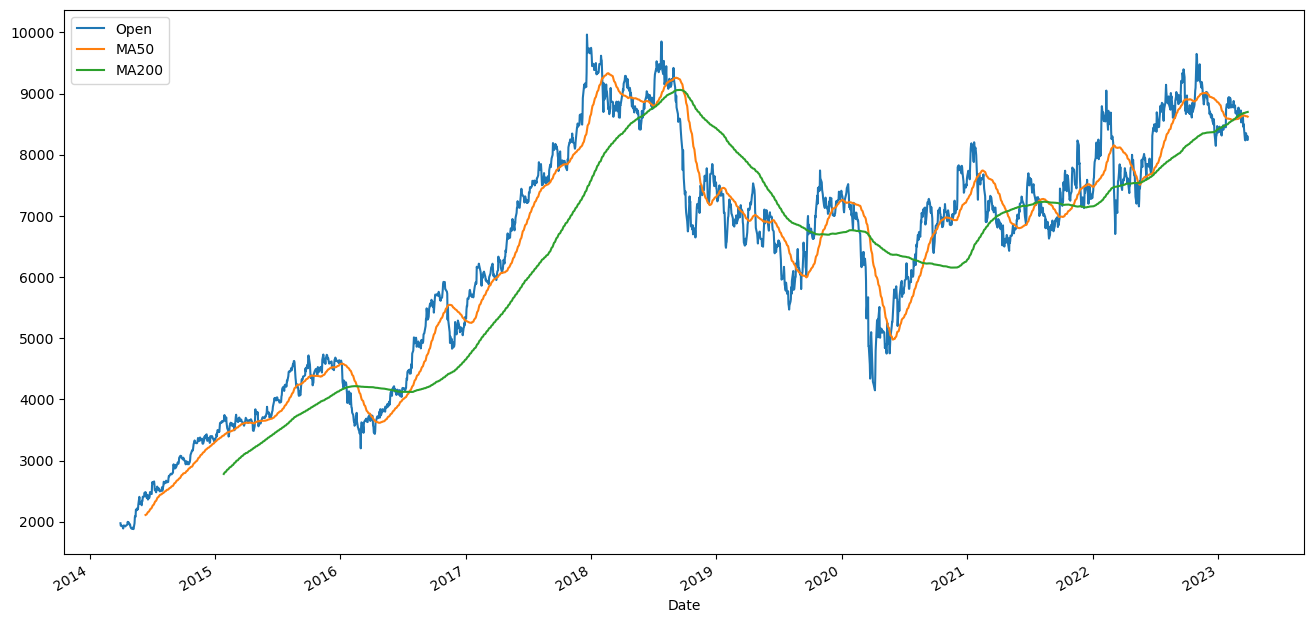

In [49]:
MA["MA50"] =MA['Open'].rolling(50).mean()
MA["MA200"] =MA['Open'].rolling(200).mean()
MA[['Open','MA50','MA200']].plot(label='gm' ,figsize=(16,8))

<AxesSubplot:xlabel='Date'>

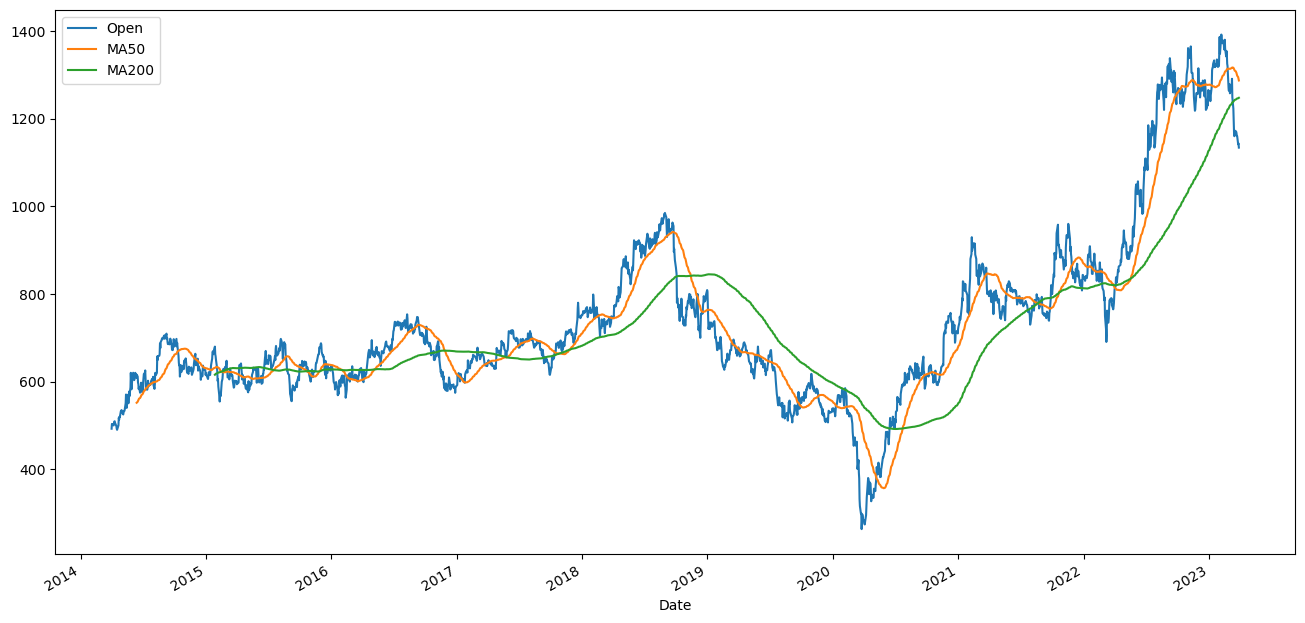

In [97]:
MM["MA50"] =MM['Open'].rolling(50).mean()
MM["MA200"] =MM['Open'].rolling(200).mean()
MM[['Open','MA50','MA200']].plot(label='gm' ,figsize=(16,8))

<AxesSubplot:xlabel='Date'>

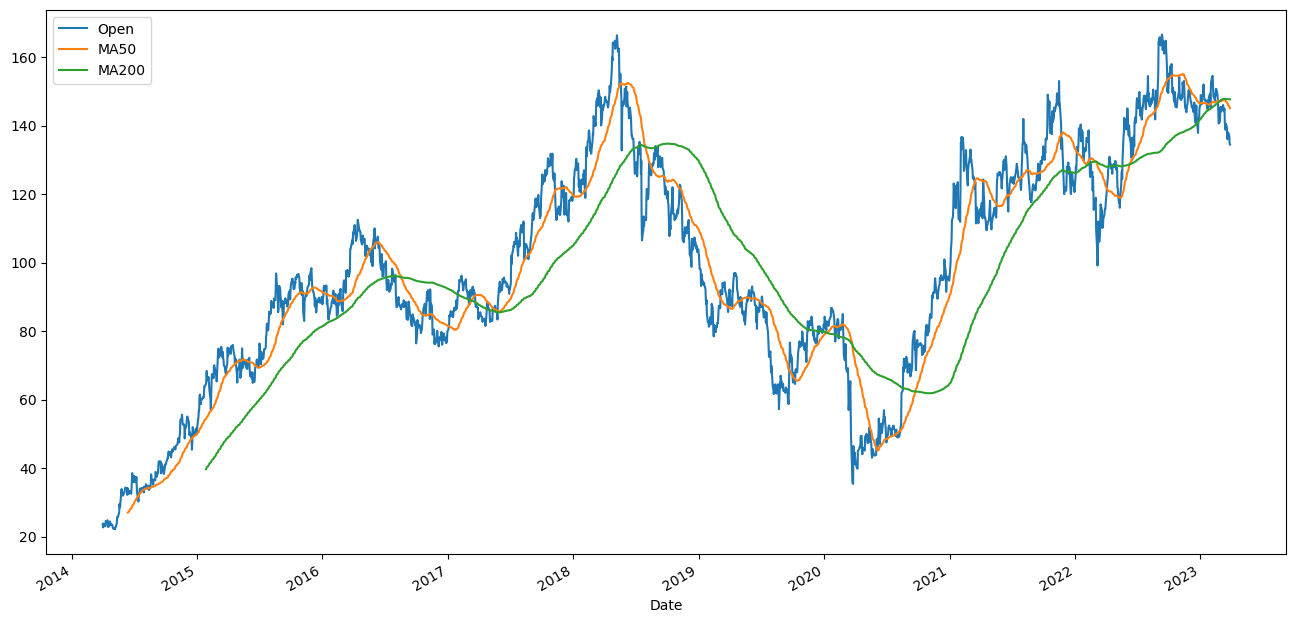

In [98]:
AL["MA50"] =AL['Open'].rolling(50).mean()
AL["MA200"] =AL['Open'].rolling(200).mean()
AL[['Open','MA50','MA200']].plot(label='gm' ,figsize=(16,8))

In [50]:
# TO plot the relationship or co-relations b/w the stocks we can use the scatter matrix plot from pandas_plotting.
from pandas.plotting import scatter_matrix

In [57]:
# Create a new df of all Open price columns of all stocks 
car_comp = pd.concat([TM['Open'],AL['Open'],MM['Open'],MA['Open']],axis=1)
# Giving the name for the columns
car_comp.columns = ['TM Open','AL Open','MM Open','MA Open']
# car_comp

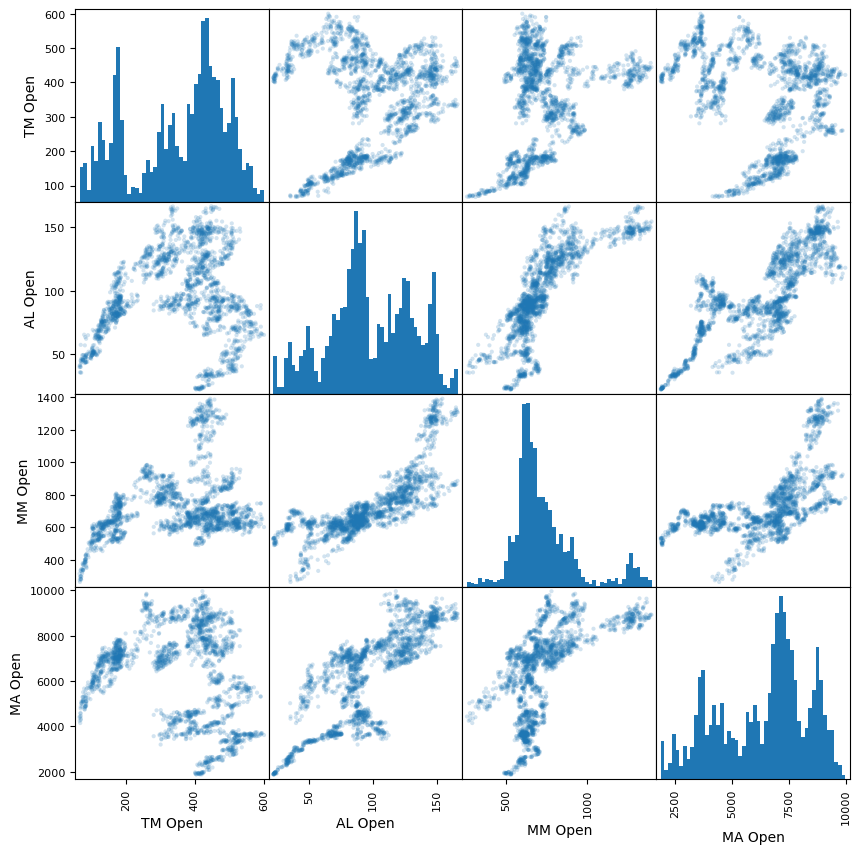

In [94]:
# you can use ';' to remove the axes print outs
scatter_matrix(car_comp,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:>

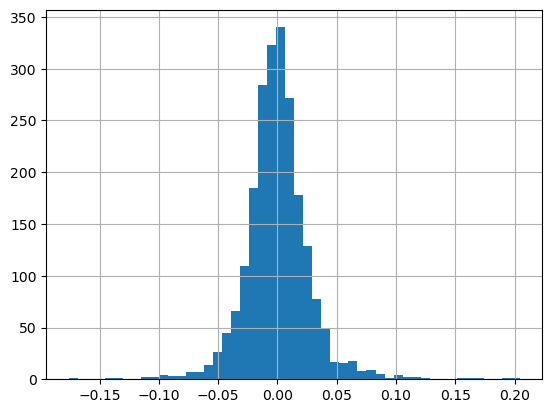

In [75]:
# rate of interest
TM['returns'] =(TM['Close']/TM['Close'].shift(1))-1
TM['returns'].hist(bins=50)

<AxesSubplot:>

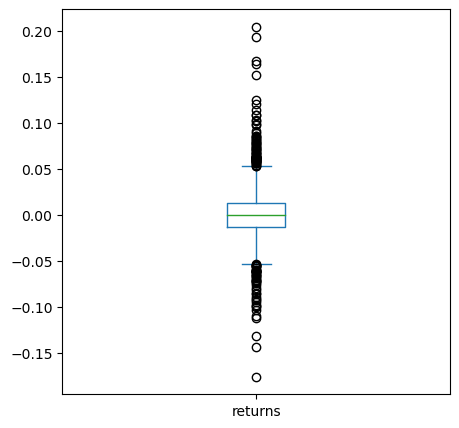

In [109]:
TM['returns'].plot(kind='box',figsize=(5,5))

<AxesSubplot:>

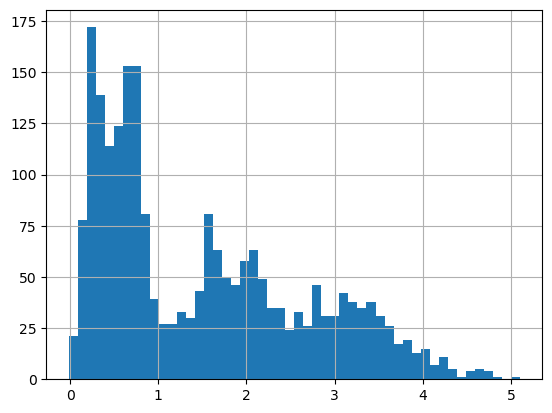

In [100]:
MM['returns'] =(MM['Close']/TM['Close'].shift(1))-1
MM['returns'].hist(bins=50)

<AxesSubplot:>

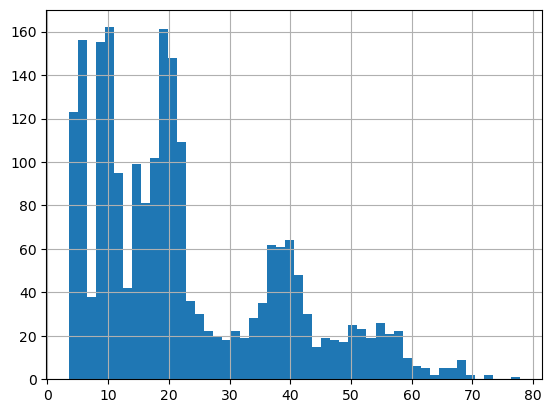

In [101]:
MA['returns'] =(MA['Close']/TM['Close'].shift(1))-1
MA['returns'].hist(bins=50)

<AxesSubplot:>

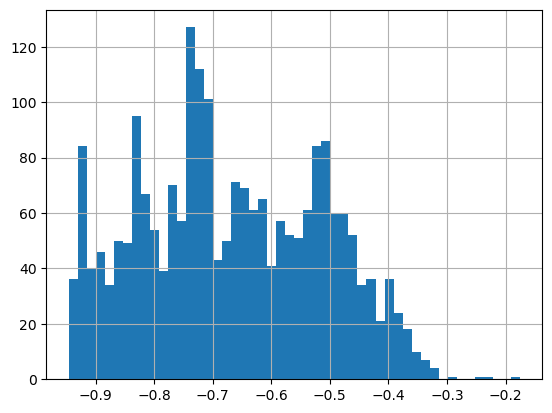

In [102]:
AL['returns'] =(AL['Close']/TM['Close'].shift(1))-1
AL['returns'].hist(bins=50)

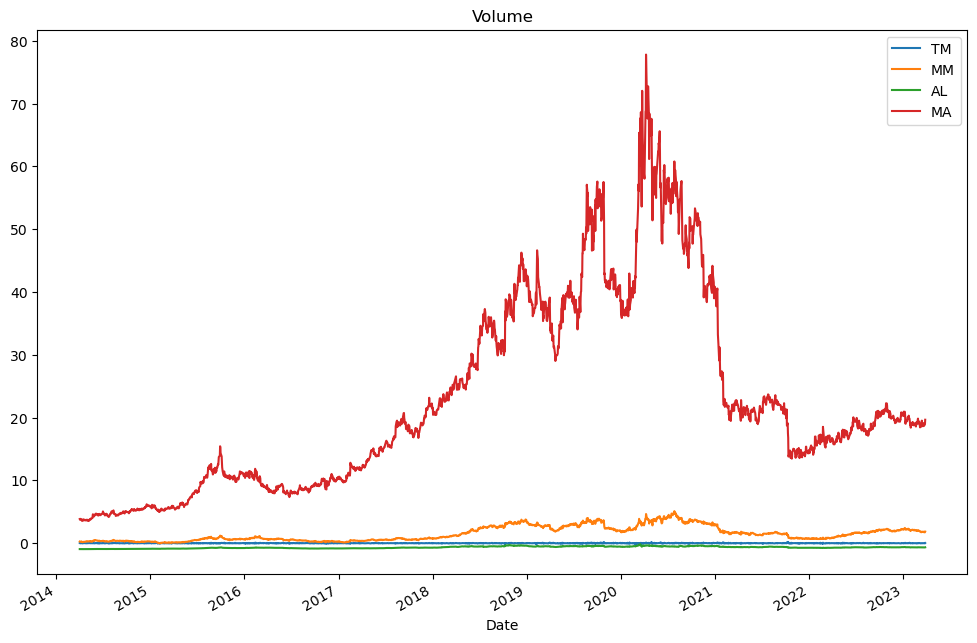

In [103]:
TM['returns'].plot(label='TM' ,title="returns",figsize=(12,8))
MM['returns'].plot(label='MM')
AL['returns'].plot(label='AL')
MA['returns'].plot(label='MA')
plt.legend()

(-100.0, 100.0)

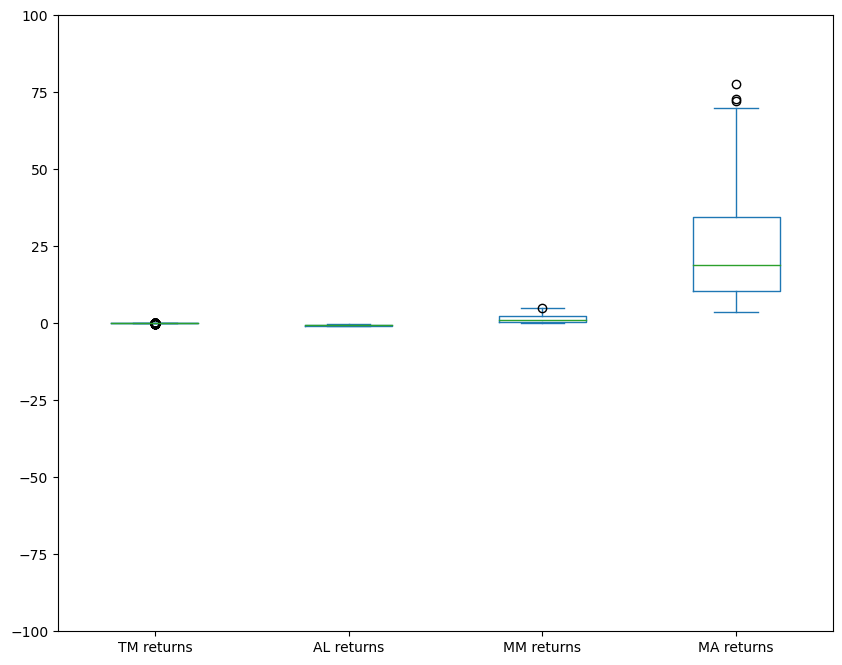

In [128]:
car_returns = pd.concat([TM['returns'],AL['returns'],MM['returns'],MA['returns']],axis=1)
car_returns.columns = ['TM returns','AL returns','MM returns','MA returns']
car_returns.plot(kind='box',figsize=(10,8))
plt.ylim([ -100,100])